# Emotion Analysis and Detection

In the realm of Natural Language Processing (NLP), understanding human emotions through text data has become a fascinating and essential pursuit. Imagine being able to discern not just the words someone types, but the underlying sentiment and mood behind those words. This is precisely what our project on emotion sentiment analysis aims to achieve.

By leveraging machine learning algorithms and deep learning architectures, we seek to address fundamental questions such as determining the sentiment of customer feedback and unveiling the mood surrounding specific contexts, such as today's special food item.



# Importing Necessary Libraries


In [1]:
import numpy as np                  # For vector calculations
import pandas as pd                 # For data manipulation and analysis
import matplotlib.pyplot as plt     # For creating plots and visualizations
import seaborn as sns               # For statistical data visualization
import nltk                         # Natural Language Toolkit
from nltk.corpus import stopwords   # For accessing common stopwords in English
from nltk.stem import PorterStemmer # For word stemming
import re                           # For regular expressions
import warnings                     # For suppressing warnings

# Suppressing warnings for cleaner output
warnings.filterwarnings('ignore')

# Setting display option to show all columns in pandas DataFrames
pd.set_option('display.max_columns', None)

In [2]:
file_path = 'val.txt'
val_df = pd.read_csv(file_path, sep=';', header=None, names=['Text', 'Emotion'])
file_path = 'test.txt'
test_df = pd.read_csv(file_path, sep=';', header=None, names=['Text', 'Emotion'])
file_path = 'train.txt'
train_df = pd.read_csv(file_path, sep=';', header=None, names=['Text', 'Emotion'])

train_df.info()
print('-----------------------------------------------------------------------')
test_df.info()
print('-----------------------------------------------------------------------')
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     16000 non-null  object
 1   Emotion  16000 non-null  object
dtypes: object(2)
memory usage: 250.1+ KB
-----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     2000 non-null   object
 1   Emotion  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
-----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     2000 non-null   object
 1   Emotion  2000 non-null   object
dtypes: o

# Analyzing Emotion Distribution in Validation Dataset


In [3]:
val_df['Emotion'].value_counts()


joy         704
sadness     550
anger       275
fear        212
love        178
surprise     81
Name: Emotion, dtype: int64

In [4]:
val_df['text_length'] = val_df['Text'].apply(len)   # Calculating text length for each entry in the 'Text' column

max_length_index = val_df['text_length'].idxmax()   # Finding the row with the maximum text length

emotion = val_df.iloc[max_length_index]['Emotion']  # Extracting the emotion and text with the maximum length
text = val_df.iloc[max_length_index]['Text']

print('The text is: ' + text)
print('The emotion is: ' + emotion)

The text is: i couldnt hellip even when it made my heart ache to simply look at you hellip because i loved you so much and i knew you would never return my feelings hellip and i couldnt bring myself to hate you for the idiotic stunt you pulled in the other room either though i do ask that you dont repeat it
The emotion is: sadness


In [5]:
nltk.download('stopwords')          # Downloading the stopwords corpus from NLTK
print(stopwords.words('english'))   # Printing the list of English stopwords

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to C:\Users\Lokendra
[nltk_data]     Pratap\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Function for text preprocessing


In [6]:
def text_processing(text):
    text = re.sub('[^a-zA-Z]', ' ', text)   # Removing non-alphabetic characters
    text = text.lower()                     # Converting text to lowercase
    text = text.split()                     # Tokenizing text into words
    ps = PorterStemmer()                    # Initializing PorterStemmer for word stemming
    text = [ps.stem(word) for word in text if word not in set(stopwords.words('english'))]  # Stemming and removing stopwords
    text = ' '.join(text)                   # Joining the processed words back into a string
    return text

# Applying text preprocessing function to 'Text' column in DataFrames
val_df['Text'] = val_df['Text'].apply(text_processing)
train_df['Text'] = train_df['Text'].apply(text_processing)
test_df['Text'] = test_df['Text'].apply(text_processing)

# Displaying a sample of 10 entries from the training DataFrame after text processing
train_df.sample(10)

,Text,Emotion
15888,feel respect month tell love alon strike fanci,joy
11881,feel hire billi sasha pay billi play catch wor...,sadness
5296,woke feel hope,joy
10753,im feel virtuou come home hour yoga session si...,joy
3910,learn lesson would never repeat mistak seen re...,sadness
10864,odd realiz week battl feel complet gloomi,sadness
7930,feel extrem bore,sadness
6232,tri think anywher els ive made feel aw aw aw,sadness
1376,ill smoke cigarett im feel littl nervou,fear
15206,often look back younger year feel asham thing ...,sadness


# Models

# Naive Bayes and Support Vector Machine


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score

# Creating pipelines for Naive Bayes and SVM classifiers with TF-IDF vectorizer
nb_classifier = make_pipeline(TfidfVectorizer(), MultinomialNB())
svm_classifier = make_pipeline(TfidfVectorizer(), SVC())

# Extracting features (x) and labels (y) from training data
x = train_df['Text']
y = train_df['Emotion']

# Fitting the classifiers on training data
nb_classifier.fit(x, y)
svm_classifier.fit(x, y)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()), ('svc', SVC())])

In [8]:
# Making predictions using Naive Bayes and SVM classifiers on the test data
nb_predictions = nb_classifier.predict(test_df['Text'])
svm_predictions = svm_classifier.predict(test_df['Text'])

# Calculating accuracy scores for Naive Bayes and SVM classifiers
nb_accuracy = accuracy_score(test_df['Emotion'], nb_predictions)
svm_accuracy = accuracy_score(test_df['Emotion'], svm_predictions)

# Printing accuracy scores
print("Naive Bayes Classifier Accuracy:", nb_accuracy)
print("SVM Classifier Accuracy:", svm_accuracy)

Naive Bayes Classifier Accuracy: 0.688
SVM Classifier Accuracy: 0.839


# Random Forest Classifier


In [9]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = make_pipeline(TfidfVectorizer(), RandomForestClassifier(random_state=42))
rf_classifier.fit(x, y)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [10]:
# Making predictions using Random Forest classifier on the test data
rf_predictions = rf_classifier.predict(test_df['Text'])

# Calculating accuracy score for Random Forest classifier
rf_accuracy = accuracy_score(test_df['Emotion'], rf_predictions)

# Printing accuracy score
print("Random Forest Classifier Accuracy:", rf_accuracy)

Random Forest Classifier Accuracy: 0.8505


# Decision Tree Classifier


In [11]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = make_pipeline(TfidfVectorizer(), DecisionTreeClassifier(random_state=42))
dt_classifier.fit(train_df['Text'], train_df['Emotion'])

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [12]:
# Making predictions using Decision Tree classifier on the test data
dt_predictions = dt_classifier.predict(test_df['Text'])

# Calculating accuracy score for Decision Tree classifier
dt_accuracy = accuracy_score(test_df['Emotion'], dt_predictions)

# Printing accuracy score
print("Decision Tree Classifier Accuracy:", dt_accuracy)

Decision Tree Classifier Accuracy: 0.7915


# K-Nearest Neighbours (KNN)


In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = make_pipeline(TfidfVectorizer(), KNeighborsClassifier())
knn_classifier.fit(train_df['Text'], train_df['Emotion'])

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [14]:
# Making predictions using KNN classifier on the test data
knn_predictions = knn_classifier.predict(test_df['Text'])

# Calculating accuracy score for KNN classifier
knn_accuracy = accuracy_score(test_df['Emotion'], knn_predictions)

# Printing accuracy score
print("KNN Classifier Accuracy:", knn_accuracy)

KNN Classifier Accuracy: 0.755


# Logistic Regression


In [15]:
from sklearn.linear_model import LogisticRegression

logistic_classifier = make_pipeline(TfidfVectorizer(), LogisticRegression(max_iter=1000))
logistic_classifier.fit(train_df['Text'], train_df['Emotion'])

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [16]:
# Making predictions using Logistic Regression classifier on the test data
logistic_predictions = logistic_classifier.predict(test_df['Text'])

# Calculating accuracy score for Logistic Regression classifier
logistic_accuracy = accuracy_score(test_df['Emotion'], logistic_predictions)

# Printing accuracy score
print("Logistic Regression Classifier Accuracy:", logistic_accuracy)

Logistic Regression Classifier Accuracy: 0.8415


# Gradient Boost Classifier


In [17]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_classifier = make_pipeline(TfidfVectorizer(), GradientBoostingClassifier())
gbm_classifier.fit(train_df['Text'], train_df['Emotion'])

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

In [18]:
# Making predictions using Gradient Boosting classifier on the test data
gbm_predictions = gbm_classifier.predict(test_df['Text'])

# Calculating accuracy score for Gradient Boosting classifier
gbm_accuracy = accuracy_score(test_df['Emotion'], gbm_predictions)

# Printing accuracy score
print("Gradient Boosting Classifier Accuracy:", gbm_accuracy)

Gradient Boosting Classifier Accuracy: 0.8


# Comparing Accuracies across Models


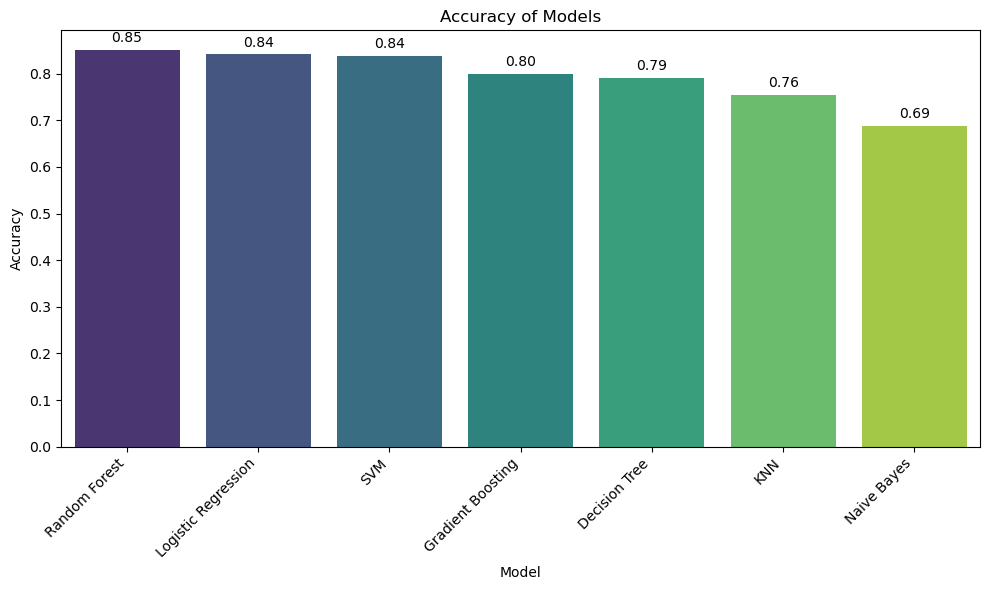

In [19]:
# Dictionary containing model accuracies
accuracies = {
    "Naive Bayes": nb_accuracy,
    "SVM": svm_accuracy,
    "Random Forest": rf_accuracy,
    "Decision Tree": dt_accuracy,
    "KNN": knn_accuracy,
    "Logistic Regression": logistic_accuracy,
    "Gradient Boosting": gbm_accuracy
}

# Sort accuracies in descending order
sorted_accuracies = sorted(accuracies.items(), key=lambda x: x[1], reverse=True)

# Extract model names and accuracies
model_names = [model[0] for model in sorted_accuracies]
accuracy_values = [model[1] for model in sorted_accuracies]

# Create countplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=model_names, y=accuracy_values, palette="viridis")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Accuracy of Models")
plt.xticks(rotation=45, ha='right')

# Annotate each bar with its accuracy value
for i, v in enumerate(accuracy_values):
    ax.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

# mporting Voting Classifiers

The Voting Classifier is a powerful ensemble learning technique used in machine learning for improving the predictive performance compared to individual models.

Improved Accuracy: The Voting Classifier combines the predictions from multiple individual classifiers (base models) and aggregates them to make a final prediction. By leveraging the collective intelligence of diverse models, it often achieves higher accuracy than any single base model.

Reduced Overfitting: Ensemble methods like the Voting Classifier tend to reduce overfitting, especially when the base models are diverse and have different sources of error. This helps generalize better to unseen data.

In [20]:
from sklearn.ensemble import VotingClassifier  # Importing Voting Classifier

# List of tuples containing estimator names and corresponding classifiers
estimators = [
    ("Random Forest", rf_classifier),
    ("Logistic Regression", logistic_classifier),
    ("SVM", svm_classifier),
    ("Gradient Boosting", gbm_classifier),
    ("Decision Tree", dt_classifier)
]

# Creating a Voting Classifier with hard voting
voting_classifier = VotingClassifier(estimators, voting='hard')

# Fitting the Voting Classifier on training data
voting_classifier.fit(train_df['Text'], train_df['Emotion'])

# Making predictions using Voting Classifier on the test data
voting_predictions = voting_classifier.predict(test_df['Text'])

# Calculating accuracy score for Voting Classifier
voting_accuracy = accuracy_score(test_df['Emotion'], voting_predictions)

# Printing accuracy score
print("Voting Classifier Accuracy:", round(voting_accuracy*100, 2), '%')

Voting Classifier Accuracy: 85.6 %


In [21]:
import pickle  # Importing pickle module

# Defining the filename for saving the model
filename = "emotion_detection.pkl"

# Saving the trained Voting Classifier model to the file using pickle
pickle.dump(voting_classifier, open(filename, 'wb'))

In [22]:
model = pickle.load(open('emotion_detection.pkl', 'rb'))